# LEARNING OBJECTIVE

This notebook shows how to visualize Poiseuille&ndash;Couette flow, which is steady pressure-driven flow in a channel with a moving wall. The notebook also shows how to understand the role of the Poiseuille number and the role of the velocity scale in being able to recover the limits of Poiseuille (pressure-driven, no moving wall) and Couette (moving wall, no pressure gradient) flow.

# PRELIMINARIES

[run the next cell to setup Python environment customizations and load packages]

In [1]:
# interactive plots setup
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# sympy setup
import sympy as sp
sp.init_printing()
from sympy.vector import *

# ploting customizations
from matplotlib import pyplot as plt
size=16
params = {'legend.fontsize': 'large',
#          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.875,
          'ytick.labelsize': size*0.875,
          'axes.titlepad': 25}
plt.rcParams.update(params)
%matplotlib inline

# numerics
import numpy as np

# for Colab only: to save plots as files and download them
#from google.colab import files

## Credit

Initial version written by [Ivan C. Christov](http://christov.tmnt-lab.org), Purdue University.

# PRESSURE-DRIVEN FLOW IN A SLOT WITH A MOVING WALL

A slot is a 2D channel with rigid parallel walls that extend infinitely out of the page.

The dimensionless solution for the combined Poiseuille&ndash;Couette flow in a slot is
$$
    \frac{v_x}{V_0}=v_x^*(y^*)=(1+\mathbb{Po})y^*-\mathbb{Po}(y^*)^2,
    \qquad y^*=\frac{y}{h},
$$
as given in Section 7.4 of Panton.

Here,
$$\mathbb{Po} = \frac{h^2\Delta p}{2\mu_0 L V_0} = \frac{\Delta p/L}{2\mu_0 V_0/h^2} = \frac{\text{imposed pressure gradient}}{2\times\text{force (per $\forall$) to drive the top wall}}$$
is a dimensionless number that I've decided to call the _Poiseuille number_ (but be careful that other [dimensionless numbers](https://en.wikipedia.org/wiki/Dimensionless_numbers_in_fluid_mechanics) may also carry this name).

$\mathbb{Po}$ can be positive or negative, depending on whether the pressure gradient is favorable or adverse.

[ASIDE: Note that we interpret $\mu_0 V_0/h^2$ as the force (per $\forall$) because the viscous term balacing the pressure gradient in the $x$-momentum equation is $\mu_0 \partial^2 v/\partial y^2$ which can be made dimensionless by divinging by precisely $\mu_0 V_0/h^2$.]

I will use a [`quiver`](https://matplotlib.org/stable/gallery/images_contours_and_fields/quiver_simple_demo.html) plot to show the velocity arrows, and a regular line plot to show he envelope of the vectors.

In [2]:
def plot_func(Po):
  # y^* goes from 0 to 1
  y = np.linspace(0, 1)
  # v_x^* as defined above
  vx = (1+Po)*y - Po*y**2

  ax = plt.axes()
  ax.set_ylabel('$y^*$')
  ax.set_ylim(0,1)
  ax.set_xlabel('$v_x^*$')

  # we have to be judicious with the xlim interval,
  # to make sure we can see the flow for all values of Po
  # allowed in the slider
  ax.set_xlim(-2.5,3.5)

  # skip every other data point (using "::2") to reduce number of arrows
  # plot arrows emanating only from the reference line, x-coord = 0
  ax.quiver(0*y[::2], y[::2],
            vx[::2], 0*vx[::2],
            scale=1., scale_units='xy', color='blue')
  ax.plot(vx, y, color='blue', linewidth=4)

  plt.show()

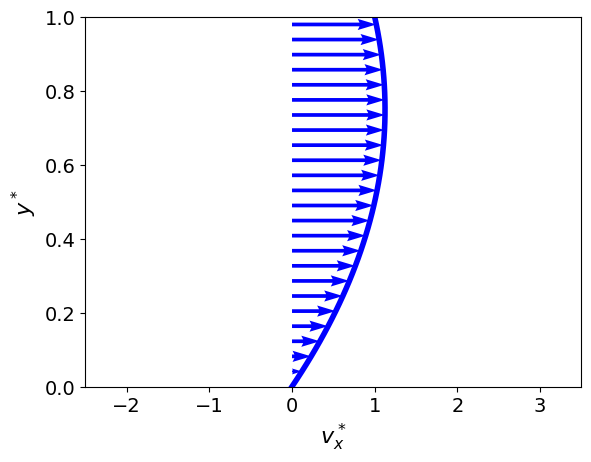

In [3]:
plot_func(2)

An [`interact`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) widget will let us vary $\mathbb{Po}$.

In [4]:
interact(plot_func, Po = widgets.FloatSlider(value=2,
                                             min=-10,
                                             max=+10,
                                             step=0.5));

interactive(children=(FloatSlider(value=2.0, description='Po', max=10.0, min=-10.0, step=0.5), Output()), _dom…

Playing with the slider on the plot, we see that changing the $\mathbb{Po}$ number changes the shape of the flow profile.

On your own:

*   Why does the profile bulge one way for $\mathbb{Po}>0$ but the other way for $\mathbb{Po}<0$? What is the physical reason?
*   Is $\mathbb{Po}=0$ special?
*   Can we recover "pure" Couette flow (no pressure gradient) for some $\mathbb{Po}$ value?   
*   Can we recover "pure" Poiseuille flow (no moving wall) for some $\mathbb{Po}$ value?



# ANOTHER REPRESENTATION OF THE SAME SOLUTION

Observing that $h^2\Delta p/(2\mu_0L)$ is also a _velocity_ (in fact, it is $6\times$ the average velocity of the pressure-driven (Poiseuille) flow, see also Panton p. 131), we could have written the dimensionless solution as
$$\frac{v_x}{h^2\Delta p/(2\mu_0L)}=v_x^*(y^*)=(\tilde{\mathbb{Po}} + 1)y^* - (y^*)^2,\qquad y^*=\frac{y}{h}.$$

Here,
$$\tilde{\mathbb{Po}} = \frac{2\mu_0 L V_0}{h^2\Delta p} = \frac{V_0}{h^2\Delta p/(2\mu_0 L)} = \frac{\text{wall velocity}}{6\times\text{avg velocity of the pressure driven flow}}$$
is again a _Poiseuille number_ (it is related to the previous one as $\tilde{\mathbb{Po}}=\mathbb{Po}^{-1}$.

Both, $\tilde{\mathbb{Po}}$ and $\mathbb{Po}$, are equally valid dimensionless number to describe this flow.

In [5]:
def plot_func_tilde(PoTilde):
  # y^* goes from 0 to 1
  y = np.linspace(0, 1)
  # v_x^* as defined above
  vx = (PoTilde+1)*y - y**2

  ax = plt.axes()
  ax.set_ylabel('$y^*$')
  ax.set_ylim(0,1)
  ax.set_xlabel('$v_x^*$')
  ax.set_xlim(-2,2)

  # skip every other data point (using "::2") to reduce number of arrows
  # plot arrows emanating only from the reference line, x-coord = 0
  ax.quiver(0*y[::2], y[::2],
            vx[::2], 0*vx[::2],
            scale=1., scale_units='xy', color='blue')
  ax.plot(vx, y, color='blue', linewidth=4)

  plt.show()

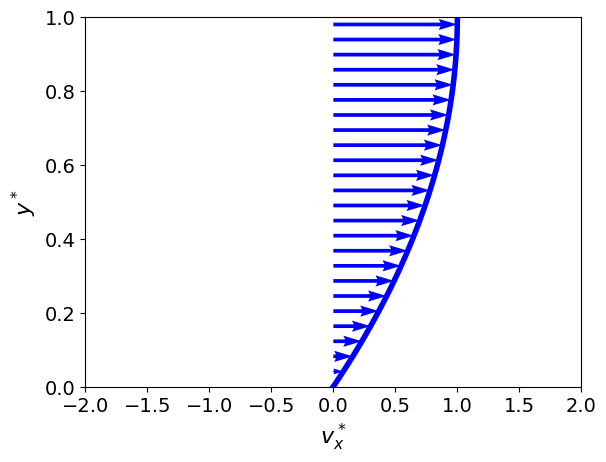

In [6]:
plot_func_tilde(1)

In [ ]:
interact(plot_func_tilde, PoTilde = widgets.FloatSlider(value=1,
                                                        min=-1.5,
                                                        max=+1.5,
                                                        step=0.05));

interactive(children=(FloatSlider(value=1.0, description='PoTilde', max=1.5, min=-1.5, step=0.05), Output()), …

Now:

*   How is this representation physically different from the previous one?
*   What does the special case $\tilde{\mathbb{Po}}=0$ mean?
*   Can we recover "pure" Couette flow (no pressure gradient) for some $\tilde{\mathbb{Po}}$ value?   
*   Can we recover "pure" Poiseuille flow (no moving wall) for some $\tilde{\mathbb{Po}}$ value?
